# Effective XGBoost Course

© 2023 MetaSnake, All rights reserved



XGBoost is a powerful machine learning technique. We will learn how to train and deploy XGBoost models on your data from start to finish. With this approach, you can build highly accurate models that are optimized for your specific use case.

## Outline

* Load data
* Explore data
* Clean up data
* Initial Model
* Evaluation
* Tuning
* Data size
* Interpreting
* Deployment

## Load Data

Loading and preparing data is a critical step in the XGBoost modeling process, as it helps to ensure that your model is based on high-quality, relevant data. In this section, we will load the data.

The Bank Marketing dataset from UCI is a popular dataset hsfrequently used in machine learning and data science projects. 

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd

In [2]:
bank = pd.read_csv('data/bank-additional-full.csv', sep=';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Exploring Data

Exploring data is an essential step in the XGBoost modeling process, as it helps you understand your data better and identify any potential issues that may impact your model's accuracy. In this section, we will cover various techniques for exploring and visualizing data, so you can gain insights into your data before building your XGBoost model.


Input variables from the data:

### Client data
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
17. cons.price.idx: consumer price index. monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)
19. euribor3m: euribor 3 month rate. daily indicator (numeric)
20. nr.employed: number of employees. quarterly indicator (numeric)

### Output variable (desired target):
21. y. has the client subscribed a term deposit? (binary: 'yes','no')


In [3]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
bank.shape

(41188, 21)

In [5]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
(bank
.assign(success=(bank.y == 'yes').astype(int))
.select_dtypes('number')
.corr(method='spearman')
.style
.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,success
age,1.000000,-0.002123,0.005715,-0.001062,-0.012643,0.045003,0.044790,0.114536,0.054391,0.044789,-0.011861
duration,-0.002123,1.000000,-0.080953,-0.083072,0.042407,-0.069201,0.002854,-0.008678,-0.078346,-0.095225,0.348777
campaign,0.005715,-0.080953,1.000000,0.055514,-0.087420,0.156360,0.096494,-0.001554,0.140512,0.144264,-0.063668
pdays,-0.001062,-0.083072,0.055514,1.000000,-0.509583,0.227698,0.056763,-0.077265,0.278488,0.290673,-0.324942
previous,-0.012643,0.042407,-0.087420,-0.509583,1.000000,-0.435293,-0.282720,-0.115967,-0.454724,-0.438721,0.200914
emp.var.rate,0.045003,-0.069201,0.156360,0.227698,-0.435293,1.000000,0.664890,0.224693,0.939915,0.944702,-0.247480
cons.price.idx,0.044790,0.002854,0.096494,0.056763,-0.282720,0.664890,1.000000,0.245633,0.490970,0.464738,-0.122187
cons.conf.idx,0.114536,-0.008678,-0.001554,-0.077265,-0.115967,0.224693,0.245633,1.000000,0.236646,0.132707,0.041229
euribor3m,0.054391,-0.078346,0.140512,0.278488,-0.454724,0.939915,0.490970,0.236646,1.000000,0.928857,-0.266822
nr.employed,0.044789,-0.095225,0.144264,0.290673,-0.438721,0.944702,0.464738,0.132707,0.928857,1.000000,-0.283957


<Axes: >

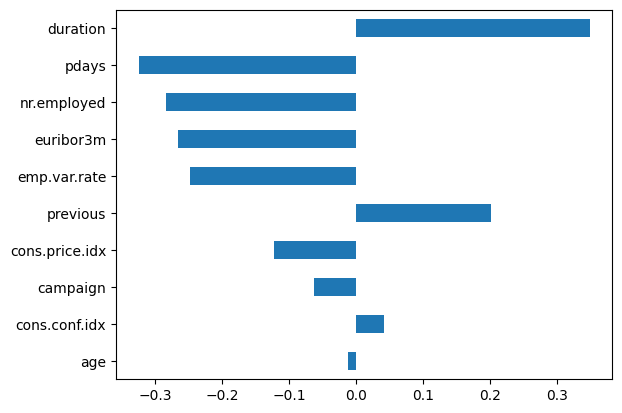

In [16]:
(bank
.assign(success=(bank.y == 'yes').astype(int))
.select_dtypes('number')
 .corr(method='spearman')
 .loc[:, 'success']
 .iloc[:-1]
 .sort_values(key=lambda val: abs(val))
 .plot.barh()
)


In [19]:
(bank
.groupby('y')
.corr(method='spearman', numeric_only=True)
.style
.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

In [20]:
bank.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

<Axes: xlabel='marital'>

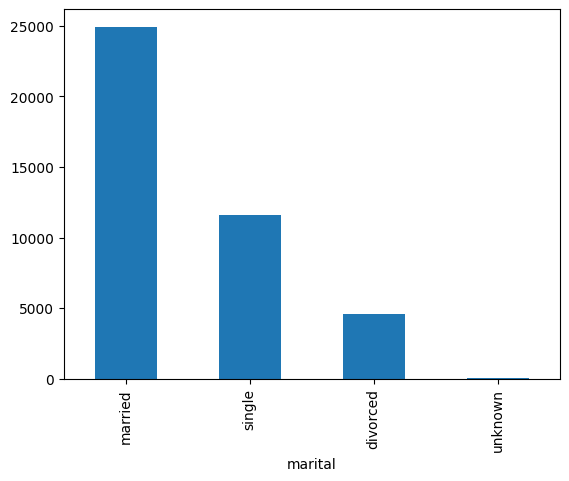

In [21]:
bank.marital.value_counts().plot.bar()

In [22]:
bank.poutcome.value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [23]:
for col in bank.select_dtypes(object):
  print(f'{col}\n\n{bank[col].value_counts(dropna=False)}\n\n')

job

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


marital

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


education

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


default

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


housing

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


loan

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64


contact

In [24]:
(pd.crosstab(bank.job, bank.y, normalize='index')
 .style
 .background_gradient(cmap='RdBu', vmin=0, vmax=1, axis='index')
)

y,no,yes
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


<Axes: >

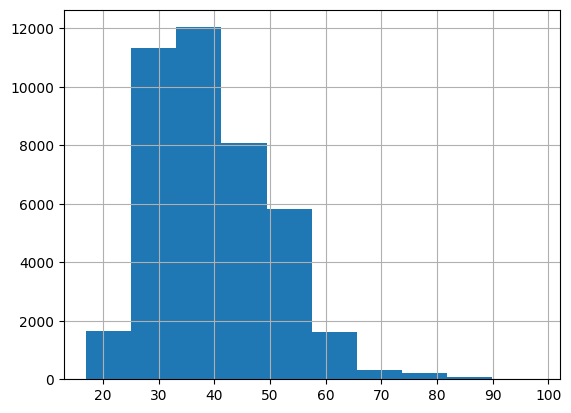

In [25]:
# useful for viewing distribution and discovering outliers

bank.age.hist()

<Axes: >

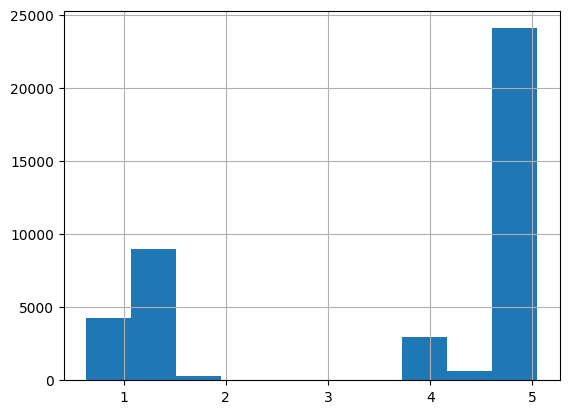

In [26]:
bank.euribor3m.hist()

<Axes: >

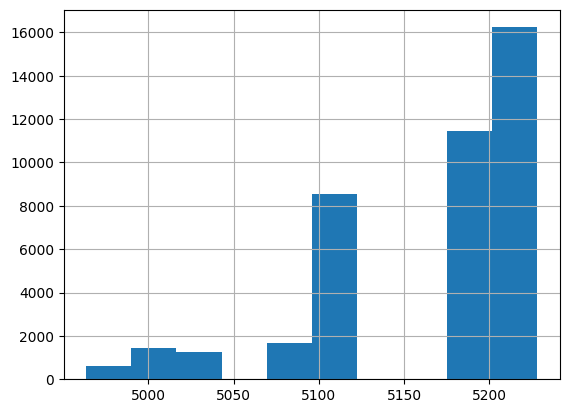

In [27]:
bank['nr.employed'].hist()

In [28]:
pd.crosstab(bank.default, bank.y)

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


<Axes: xlabel='default'>

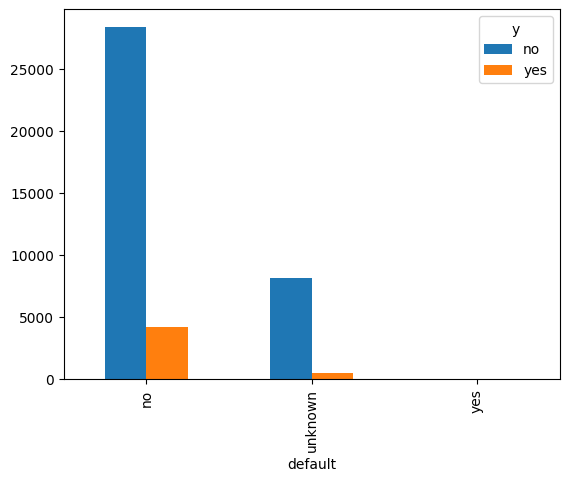

In [29]:
pd.crosstab(bank.default, bank.y).plot.bar()

<Axes: xlabel='y'>

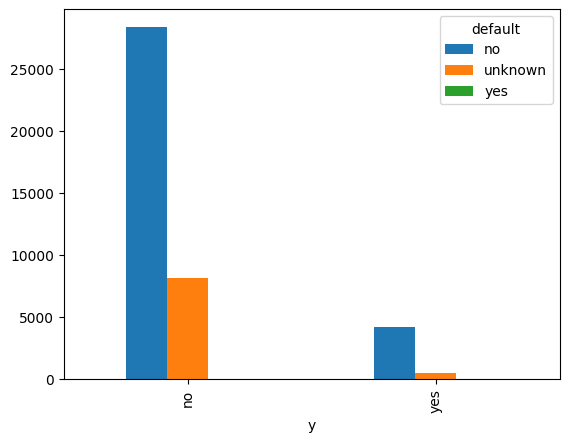

In [30]:
pd.crosstab(bank.default, bank.y).T.plot.bar()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

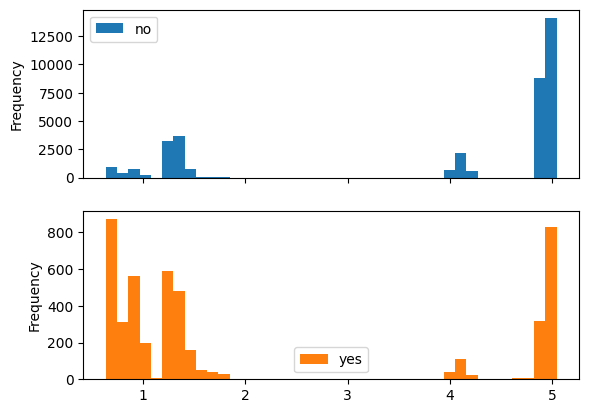

In [31]:
(bank
.pivot(columns='y', values='euribor3m')
.plot.hist(bins=40, subplots=True)
)

In [32]:
(bank
.groupby('default')
.describe()
.stack()
.unstack(level=0)
#.T
)


age                              duration                
default            no      unknown        yes            no      unknown   
count    32588.000000  8597.000000   3.000000  32588.000000  8597.000000  \
mean        39.140635    43.371990  42.333333    259.842549   252.435035   
std         10.477032     9.488981   9.814955    261.069492   252.336038   
min         17.000000    19.000000  31.000000      0.000000     5.000000   
25%         31.000000    36.000000  39.500000    103.750000    98.000000   
50%         37.000000    43.000000  48.000000    181.000000   175.000000   
75%         46.000000    51.000000  48.000000    321.000000   313.000000   
max         95.000000    98.000000  48.000000   4918.000000  3366.000000   

                         campaign                                pdays  ...   
default         yes            no      unknown       yes            no  ...   
count      3.000000  32588.000000  8597.000000  3.000000  32588.000000  ...  \
mean     103.333333      2.520744     2.745609  1.333333    954.787130  ...   
std       34.151623      2.707943     2.987461  0.577350    204.815798  ...   
min       66.000000      1.000000     1.000000  1.000000      0.000000  ...   
25%       88.500000      1.000000     1.000000  1.000000    999.000000  ...   
50%      111.000000      2.000000     2.000000  1.000000    999.000000  ...   
75%      122.000000      3.000000     3.000000  1.500000    999.000000  ...   
max      133.000000     43.000000    56.000000  2.000000    999.000000  ...   

        cons.price.idx cons.conf.idx                             euribor3m   
default            yes            no      unknown        yes            no   
count         3.000000  32588.000000  8597.000000   3.000000  32588.000000  \
mean         93.362667    -40.565469   -40.265139 -38.066667      3.447246   
std           0.140873      4.804758     3.878180   3.406367      1.783904   
min          93.200000    -50.800000   -50.000000 -42.000000      0.634000   
25%          93.322000    -42.700000   -42.700000 -39.050000      1.313000   
50%          93.444000    -41.800000   -41.800000 -36.100000      4.856000   
75%          93.444000    -36.400000   -36.400000 -36.100000      4.961000   
max          93.444000    -26.900000   -26.900000 -36.100000      5.045000   

                                 nr.employed                            
default      unknown       yes            no      unknown          yes  
count    8597.000000  3.000000  32588.000000  8597.000000     3.000000  
mean        4.280654  4.693000   5159.990214  5193.725951  5217.333333  
std         1.341625  0.467654     75.795949    48.289122    18.648414  
min         0.635000  4.153000   4963.600000  4963.600000  5195.800000  
25%         4.856000  4.558000   5099.100000  5191.000000  5211.950000  
50%         4.864000  4.963000   5191.000000  5228.100000  5228.100000  
75%         4.962000  4.963000   5228.100000  5228.100000  5228.100000  
max         4.970000  4.963000   5228.100000  5228.100000  5228.100000  

[8 rows x 30 columns]

<Axes: xlabel='pdays', ylabel='campaign'>

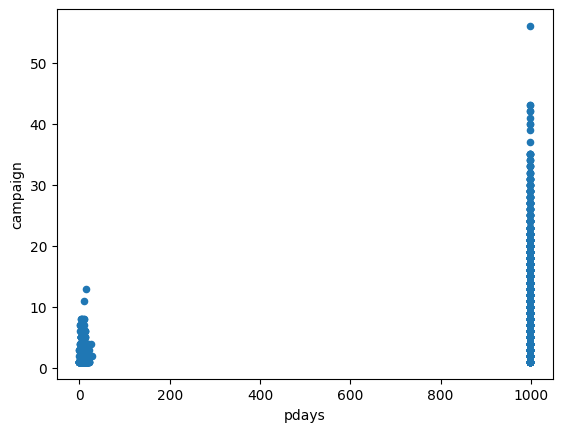

In [33]:
(bank
 .plot.scatter(x='pdays', y='campaign')
)

<Axes: xlabel='pdays', ylabel='campaign'>

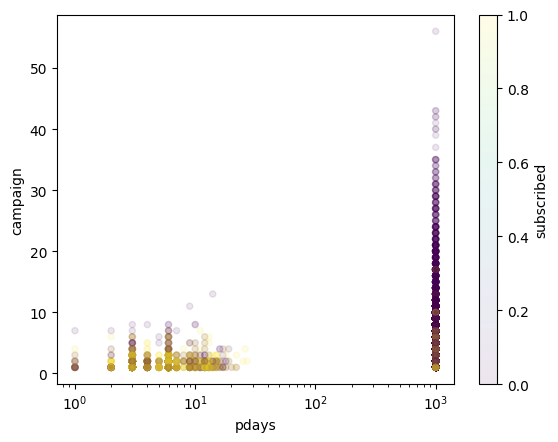

In [38]:
(bank
 .assign(subscribed=(bank.y == 'yes').astype(int))
 .pipe(lambda df_: df_.plot.scatter(x='pdays', y='campaign', logx=True, alpha=.1, c='subscribed', cmap='viridis'))
)

y
no     Axes(0.125,0.11;0.775x0.77)
yes    Axes(0.125,0.11;0.775x0.77)
Name: campaign, dtype: object

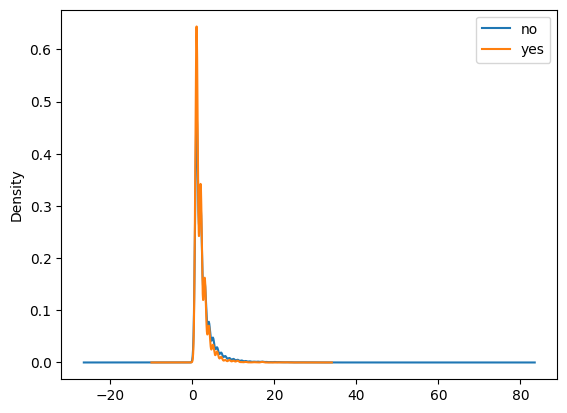

In [39]:
(bank
.groupby('y')
.campaign
.plot.density(legend=True))


y
no     AxesSubplot(0.125,0.11;0.775x0.77)
yes    AxesSubplot(0.125,0.11;0.775x0.77)
Name: pdays, dtype: object

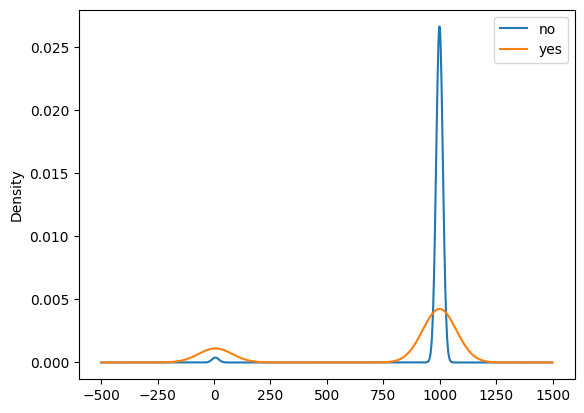

In [50]:
(bank
.groupby('y')
.pdays
.plot.density(legend=True))


y
no     AxesSubplot(0.125,0.11;0.775x0.77)
yes    AxesSubplot(0.125,0.11;0.775x0.77)
Name: duration, dtype: object

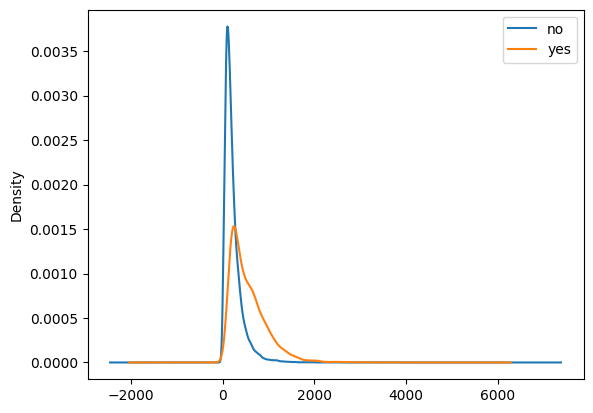

In [51]:
(bank
.groupby('y')
.duration
.plot.density(legend=True))


y
no     Axes(0.125,0.11;0.775x0.77)
yes    Axes(0.125,0.11;0.775x0.77)
Name: duration, dtype: object

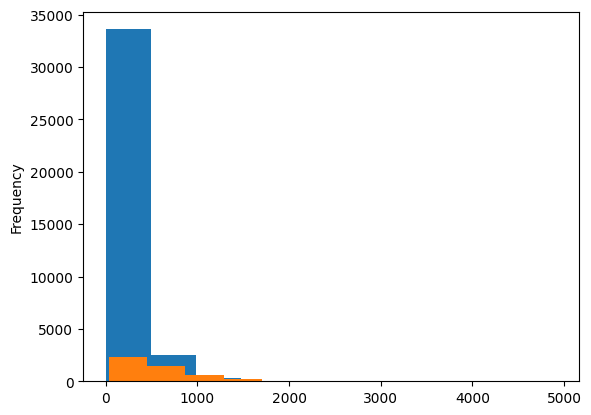

In [40]:
(bank
.groupby('y')
.duration
.plot.hist())


## Clean up Data

Cleaning up data is a critical step in the XGBoost modeling process, as it helps to ensure that your model is based on high-quality, error-free data. In this section, we will cover various techniques for cleaning up data, such as handling missing values, dealing with outliers, and encoding categorical variables, so you can prepare your data for use in an XGBoost model.

In [43]:
(bank
 .isna()
 .any()
)

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [45]:
def tweak_bank(df):
    return (df
        .assign(**df.select_dtypes(object).astype('category'))
    )

tweak_bank(bank)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [46]:
bank.memory_usage(deep=True).sum()

31730891

In [47]:
tweak_bank(bank).memory_usage(deep=True).sum()

3753617

In [48]:
from sklearn import base, pipeline
from feature_engine import encoding, imputation

class BankTransformer(base.BaseEstimator, base.TransformerMixin):
    def transform(self, X):
        return tweak_bank(X)
    def fit(self, X, y=None):
        return self

pl = pipeline.Pipeline(
    [('tweak', BankTransformer()),
     ('cat_encoder', encoding.OneHotEncoder(top_categories=5, drop_last=True)),
     #('num_impute', imputation.MeanMedianImputer(imputation_method='median'))
    ]
)

pl.fit_transform(bank)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,1,0,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,1,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,1,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,1,0,0,0,1


In [49]:
from sklearn import model_selection
X_raw_train, X_raw_test, y_raw_train, y_raw_test= model_selection.train_test_split(
    bank.drop(columns='y'), bank.y, stratify=bank.y, random_state=42)
X_train = pl.fit_transform(X_raw_train)
X_test = pl.transform(X_raw_test)

In [50]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jun,month_nov,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
34300,29,10,10,999,0,-1.8,92.893,-46.2,1.266,5099.1,...,0,0,1,0,0,0,0,1,0,0
25076,54,53,1,999,1,-0.1,93.200,-42.0,4.153,5195.8,...,0,1,0,0,0,1,0,0,1,0
17533,55,136,3,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,1,0,0,0,1,0,0
35820,43,715,6,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,0,0,0,1,0,0,0,1,0,0
1080,54,62,5,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14392,54,131,4,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,1,0,0,0,1,0,0
7494,29,165,1,999,0,1.1,93.994,-36.4,4.864,5191.0,...,0,0,0,0,0,0,1,1,0,0
10747,35,544,3,999,0,1.4,94.465,-41.8,4.961,5228.1,...,1,0,0,0,0,1,0,1,0,0
34138,32,1805,4,999,0,-1.8,92.893,-46.2,1.281,5099.1,...,0,0,0,0,1,0,0,1,0,0


In [51]:
# cleanup
from feature_engine import encoding, imputation
import pandas as pd
from sklearn import base, compose, model_selection, pipeline, preprocessing


bank = pd.read_csv('data/bank-additional-full.csv', sep=';')

def tweak_bank(df):
    return (df
        .assign(**df.select_dtypes(object).astype('category'))
    )


class BankTransformer(base.BaseEstimator, base.TransformerMixin):
    def transform(self, X):
        return tweak_bank(X)
        #return X
    def fit(self, X, y=None):
        return self

pl = pipeline.Pipeline(
    [('tweak', BankTransformer()),
     ('cat_encoder', encoding.OneHotEncoder(top_categories=5, drop_last=True)),
     #('num_impute', imputation.MeanMedianImputer(imputation_method='median'))
    ]
)

X_raw_train, X_raw_test, y_raw_train, y_raw_test= model_selection.train_test_split(
    bank.drop(columns='y'), bank.y, stratify=bank.y, random_state=42)
X_train = pl.fit_transform(X_raw_train)
X_test = pl.transform(X_raw_test)

label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_raw_train)
y_test = label_encoder.transform(y_raw_test)

In [52]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jun,month_nov,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
34300,29,10,10,999,0,-1.8,92.893,-46.2,1.266,5099.1,...,0,0,1,0,0,0,0,1,0,0
25076,54,53,1,999,1,-0.1,93.200,-42.0,4.153,5195.8,...,0,1,0,0,0,1,0,0,1,0
17533,55,136,3,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,1,0,0,0,1,0,0
35820,43,715,6,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,0,0,0,1,0,0,0,1,0,0
1080,54,62,5,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14392,54,131,4,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,1,0,0,0,1,0,0
7494,29,165,1,999,0,1.1,93.994,-36.4,4.864,5191.0,...,0,0,0,0,0,0,1,1,0,0
10747,35,544,3,999,0,1.4,94.465,-41.8,4.961,5228.1,...,1,0,0,0,0,1,0,1,0,0
34138,32,1805,4,999,0,-1.8,92.893,-46.2,1.281,5099.1,...,0,0,0,0,1,0,0,1,0,0


In [53]:
# double check we don't have missing values
X_train.isna().any()

age                              False
duration                         False
campaign                         False
pdays                            False
previous                         False
emp.var.rate                     False
cons.price.idx                   False
cons.conf.idx                    False
euribor3m                        False
nr.employed                      False
job_admin.                       False
job_blue-collar                  False
job_technician                   False
job_services                     False
job_management                   False
marital_married                  False
marital_single                   False
marital_divorced                 False
marital_unknown                  False
education_university.degree      False
education_high.school            False
education_basic.9y               False
education_professional.course    False
education_basic.4y               False
default_no                       False
default_unknown          

In [54]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
X_train.shape

(30891, 48)

In [56]:
X_test.shape

(10297, 48)

## Initial Model

Creating a benchmark model is an important step in the XGBoost modeling process, as it provides a baseline for comparison with other models. In this section, we will demonstrate how to build a simple benchmark model using XGBoost.


In [57]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

0.9150237933378654

In [58]:
from sklearn import linear_model, preprocessing
std = preprocessing.StandardScaler()
lr = linear_model.LogisticRegression(penalty=None)
lr.fit(std.fit_transform(X_train), y_train)
lr.score(std.transform(X_test), y_test)

0.913761289696028

In [59]:
from sklearn import dummy

dum = dummy.DummyClassifier()
dum.fit(X_train, y_train)
dum.score(X_test, y_test)

0.8873458288821987

In [62]:
# generally we want to use early stopping

import xgboost as xgb
xg = xgb.XGBClassifier(early_stopping_rounds=30)
xg.fit(X_train, y_train, eval_set=[(X_train, y_train),
                                    (X_test, y_test)],
      verbose=10)
xg.score(X_test, y_test)

[0]	validation_0-logloss:0.28587	validation_1-logloss:0.28690
[10]	validation_0-logloss:0.16384	validation_1-logloss:0.17216
[20]	validation_0-logloss:0.15341	validation_1-logloss:0.16868
[30]	validation_0-logloss:0.14530	validation_1-logloss:0.16975
[40]	validation_0-logloss:0.13869	validation_1-logloss:0.17018
[48]	validation_0-logloss:0.13343	validation_1-logloss:0.17131


0.9218218898708361

In [65]:
xg.best_iteration

18

Text(0.5, 0, 'ntrees')

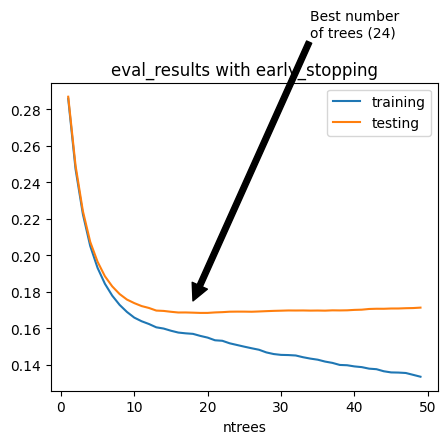

In [71]:
results = xg.evals_result()

ax = (pd.DataFrame({'training': results['validation_0']['logloss'],
                    'testing': results['validation_1']['logloss']})
  .assign(ntrees=lambda adf: range(1, len(adf)+1))      
  .set_index('ntrees')
  .plot(figsize=(5,4), 
        title='eval_results with early_stopping')
)
ax.annotate('Best number \nof trees (24)', xy=(18, .17498),
           xytext=(34,.32), arrowprops={'color':'k'})
ax.set_xlabel('ntrees')


## Evaluation

Evaluating an XGBoost model is a crucial step in the modeling process, as it helps you determine how well the model is performing and identify areas for improvement. In this section, we will cover different evaluation metrics for XGBoost models, such as accuracy, precision, recall, and F1-score, and demonstrate how to use them to evaluate the performance of your model.

In [72]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, xg.predict(X_test))
cm

array([[8859,  278],
       [ 527,  633]])

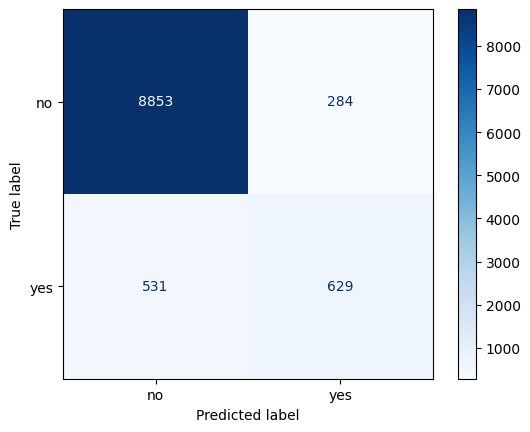

In [77]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=['no', 'yes'])
disp.plot(cmap='Blues')

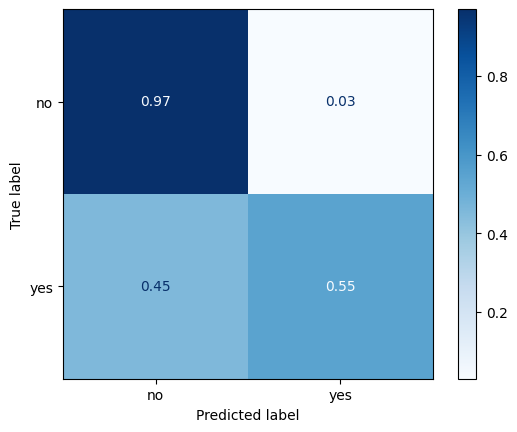

In [73]:
# cmap on raw counts many be confusing
cm = metrics.confusion_matrix(y_test, xg.predict(X_test),
                             normalize='true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=['no', 'yes'])
disp.plot(cmap='Blues')

In [74]:
from sklearn import metrics

print(metrics.classification_report(y_test, xg.predict(X_test),
                                   target_names=['N', 'Y']))

              precision    recall  f1-score   support

           N       0.94      0.97      0.96      9137
           Y       0.69      0.55      0.61      1160

    accuracy                           0.92     10297
   macro avg       0.82      0.76      0.78     10297
weighted avg       0.92      0.92      0.92     10297



In [80]:
# compare with LR shows much improvement
# (and that accuracy may be over-rated)

print(metrics.classification_report(y_test, lr.predict(X_test),
                                   target_names=['N', 'Y']))

              precision    recall  f1-score   support

           N       0.89      1.00      0.94      9137
           Y       0.25      0.00      0.00      1160

    accuracy                           0.89     10297
   macro avg       0.57      0.50      0.47     10297
weighted avg       0.82      0.89      0.83     10297



/Users/matt/.envs/menv/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


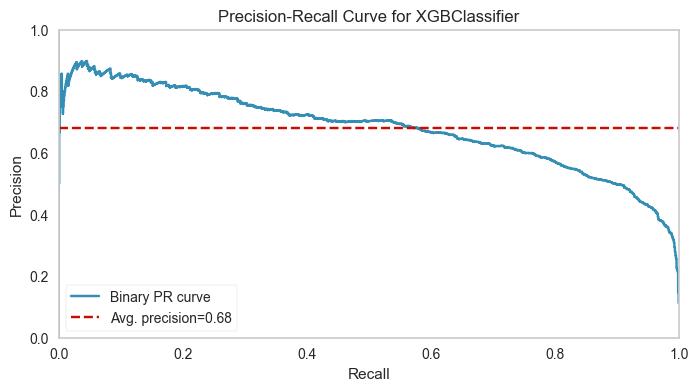

(0.0, 1.05)

In [76]:
from yellowbrick import classifier
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,4))
classifier.precision_recall_curve(xg, X_train, y_train,
    X_test, y_test, micro=False, macro=False, ax=ax, per_class=True)
ax.set_ylim((0,1.05))

In [77]:
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

def metric_data(clf, X, y, metrics=['accuracy'], cv=4):
  res =pd.DataFrame(model_selection.cross_validate(clf, X, y, cv=cv, scoring=metrics,
                                                   return_train_score=True,))
  return res
  
pl = pipeline.Pipeline(
    [('tweak', BankTransformer()),
     ('cat_encoder', encoding.OneHotEncoder(top_categories=5, drop_last=True)),
     ('xg', xgb.XGBClassifier()),
    ],
  memory='/tmp'
)

sample_size = 1000# len(bank)
small_data = bank.sample(sample_size).drop(columns=['y'])
small_y = bank.loc[small_data.index].y == 'yes'
scorers = {
            'f1_score': make_scorer(f1_score, average='micro'),
            'precision_score': make_scorer(precision_score, average='micro'),
            'recall_score': make_scorer(recall_score, average='micro'),
            'accuracy_score': make_scorer(accuracy_score),
            'roc_auc_score': make_scorer(roc_auc_score),
          }
xg_data = metric_data(pl, small_data, small_y, metrics=scorers)
xg_data

,fit_time,score_time,test_f1_score,train_f1_score,test_precision_score,train_precision_score,test_recall_score,train_recall_score,test_accuracy_score,train_accuracy_score,test_roc_auc_score,train_roc_auc_score
0,0.170391,0.019203,0.888,1.0,0.888,1.0,0.888,1.0,0.888,1.0,0.767514,1.0
1,0.120880,0.018028,0.908,1.0,0.908,1.0,0.908,1.0,0.908,1.0,0.659684,1.0
2,0.127002,0.017703,0.908,1.0,0.908,1.0,0.908,1.0,0.908,1.0,0.727679,1.0
3,0.130274,0.017425,0.872,1.0,0.872,1.0,0.872,1.0,0.872,1.0,0.639595,1.0


In [78]:
pl_lr = pipeline.Pipeline(
    [('tweak', BankTransformer()),
     ('cat_encoder', encoding.OneHotEncoder(top_categories=5, drop_last=True)),
     ('std', preprocessing.StandardScaler()),
     ('lr', linear_model.LogisticRegression(penalty=None, max_iter=300)),
    ],
  memory='/tmp/lr'
)
lr_data = metric_data(pl_lr, small_data, small_y, metrics=scorers)
lr_data


,fit_time,score_time,test_f1_score,train_f1_score,test_precision_score,train_precision_score,test_recall_score,train_recall_score,test_accuracy_score,train_accuracy_score,test_roc_auc_score,train_roc_auc_score
0,0.111057,0.015888,0.900,0.921333,0.900,0.921333,0.900,0.921333,0.900,0.921333,0.672218,0.712454
1,0.104478,0.018671,0.916,0.920000,0.916,0.920000,0.916,0.920000,0.916,0.920000,0.698146,0.700378
2,0.099650,0.017968,0.924,0.921333,0.924,0.921333,0.924,0.921333,0.924,0.921333,0.702610,0.689789
3,0.203356,0.022230,0.892,0.916000,0.892,0.916000,0.892,0.916000,0.892,0.916000,0.667754,0.692479


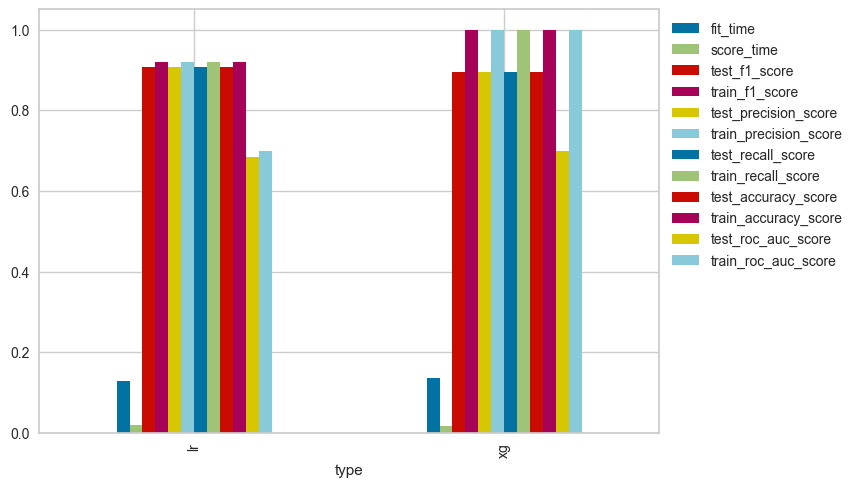

In [79]:
(xg_data
 .assign(type='xg')
 .pipe(lambda adf: pd.concat([adf, lr_data.assign(type='lr')]))
 .groupby('type')
 #.agg(['mean', 'std'])
 .mean()
 .plot.bar()
 .legend(bbox_to_anchor=(1,1))
)

## Tuning

Tuning an XGBoost model with Hyperopt is a powerful technique that can help you find the optimal hyperparameters for your model, significantly improving its performance. In this section, we will introduce Hyperopt, a Python library for hyperparameter optimization, and demonstrate how to use it to tune an XGBoost model for optimal performance.

In [80]:
import math
math.exp(-2), math.exp(3)

(0.1353352832366127, 20.085536923187668)

In [81]:
from hyperopt import fmin, tpe, hp, Trials
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import accuracy_score, roc_auc_score  

from typing import Any, Dict, Union

def hyperparameter_tuning(space: Dict[str, Union[float, int]], 
                    X_train: pd.DataFrame, y_train: pd.Series, 
                    X_test: pd.DataFrame, y_test: pd.Series, 
                    early_stopping_rounds: int=50,
                    metric:callable=accuracy_score) -> Dict[str, Any]:

    int_vals = ['max_depth', 'reg_alpha']
    space = {k: (int(val) if k in int_vals else val)
             for k,val in space.items()}
    space['early_stopping_rounds'] = early_stopping_rounds
    model = xgb.XGBClassifier(**space)
    evaluation = [(X_train, y_train),
                  (X_test, y_test)]
    model.fit(X_train, y_train,
              eval_set=evaluation, 
              verbose=False)    
         
    pred = model.predict(X_test)
    score = metric(y_test, pred)
    return {'loss': -score, 'status': STATUS_OK, 'model': model}

params = {'random_state': 42, 'eval_metric': 'aucpr'}

rounds = [{'max_depth': hp.quniform('max_depth', 1, 8, 1),  # tree
           'min_child_weight': hp.loguniform('min_child_weight', -2, 3)},
          {'scale_pos_weight':hp.uniform('scale_pos_weight', 0, 10), # imbalanced
           'max_delta_step':hp.uniform('max_delta_step', 0, 10)},
          {'subsample': hp.uniform('subsample', 0.5, 1),   # stochastic
           'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)},
          {'reg_alpha': hp.uniform('reg_alpha', 0, 10),
            'reg_lambda': hp.uniform('reg_lambda', 1, 10),},
          {'gamma': hp.loguniform('gamma', -10, 10)}, # regularization
          {'learning_rate': hp.loguniform('learning_rate', -7, 0)} # boosting
]

all_trials = []
for round in rounds:
    params = {**params, **round}
    trials = Trials()
    best = fmin(fn=lambda space: hyperparameter_tuning(space, X_train, 
                                        y_train, X_test, y_test),            
        space=params,           
        algo=tpe.suggest,            
        max_evals=20,            
        trials=trials,
    )
    params = {**params, **best}
    all_trials.append(trials)

100%|██████████| 20/20 [00:11<00:00,  1.77trial/s, best loss: -0.9181314946100806]


In [82]:
params

{'random_state': 42,
 'eval_metric': 'aucpr',
 'max_depth': 7.0,
 'min_child_weight': 0.3192066549061823,
 'scale_pos_weight': 2.13810376596408,
 'max_delta_step': 0.7724599211476146,
 'subsample': 0.9697793466536356,
 'colsample_bytree': 0.7649526520125107,
 'reg_alpha': 7.253945913257313,
 'reg_lambda': 1.55625474492629,
 'gamma': 0.0001013957812764227,
 'learning_rate': 0.047173989930597154}

In [83]:
step_params = {'random_state': 42,
 'eval_metric': 'aucpr',
 'max_depth': 5,
 'min_child_weight': 0.40955706198076997,
 'scale_pos_weight': 0.9905053053984747,
 'max_delta_step': 2.5647279651404142,
 'subsample': 0.9218283433838903,
 'colsample_bytree': 0.8745526720031428,
 'reg_alpha': 2.544255203894046,
 'reg_lambda': 5.148667230199518,
 'gamma': 7.256495602943867e-05,
 'learning_rate': 0.136232934679776}

In [84]:
import xgboost as xgb
xg_step = xgb.XGBClassifier(**step_params, early_stopping_rounds=100, n_estimators=250)
xg_step.fit(X_train, y_train, eval_set=[(X_train, y_train),
                                        (X_test, y_test)], 
           verbose=100)
xg_step.score(X_test, y_test)

[0]	validation_0-aucpr:0.55722	validation_1-aucpr:0.57881
[100]	validation_0-aucpr:0.74858	validation_1-aucpr:0.68838
[142]	validation_0-aucpr:0.77334	validation_1-aucpr:0.68527


0.9207536175585121

In [88]:
xg_step.best_iteration

42

In [89]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

0.9150237933378654

[Text(0.5, 1.0, 'ROC plots for stepwise model')]

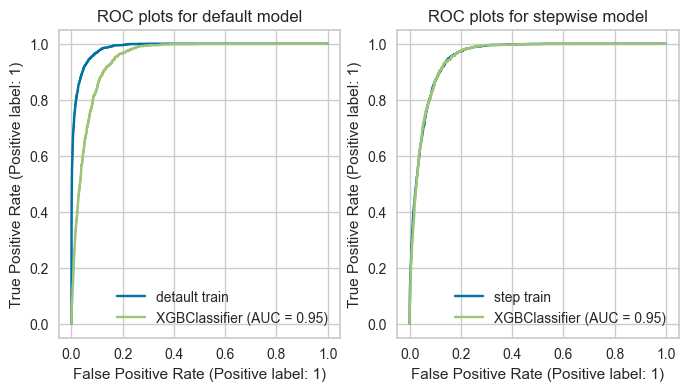

In [90]:
import matplotlib.pyplot as plt
from sklearn import metrics

fig, axes = plt.subplots(figsize=(8,4), ncols=2)
metrics.RocCurveDisplay.from_estimator(xg,
                       X_train, y_train,ax=axes[0], label='detault train')
metrics.RocCurveDisplay.from_estimator(xg,
                       X_test, y_test,ax=axes[0])#, label='default test')
axes[0].set(title='ROC plots for default model')

metrics.RocCurveDisplay.from_estimator(xg_step,
                       X_train, y_train,ax=axes[1], label='step train')
metrics.RocCurveDisplay.from_estimator(xg_step,
                       X_test, y_test,ax=axes[1])#, label='step test')
axes[1].set(title='ROC plots for stepwise model')

[Text(0.5, 1.0, 'PR plots for stepwise model')]

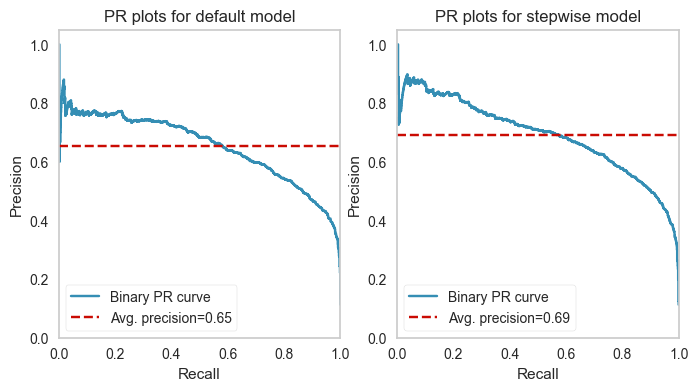

In [93]:
from yellowbrick import classifier

fig, axes = plt.subplots(figsize=(8,4), ncols=2)
classifier.precision_recall_curve(xg, X_train, y_train,
    X_test, y_test, micro=False, macro=False, ax=axes[0], per_class=True,
    show=False)
axes[0].set_ylim((0,1.05))
axes[0].set(title='PR plots for default model')

classifier.precision_recall_curve(xg_step, X_train, y_train,
    X_test, y_test, micro=False, macro=False, ax=axes[1], per_class=True,
    show=False)
axes[1].set_ylim((0,1.05))
axes[1].set(title='PR plots for stepwise model')

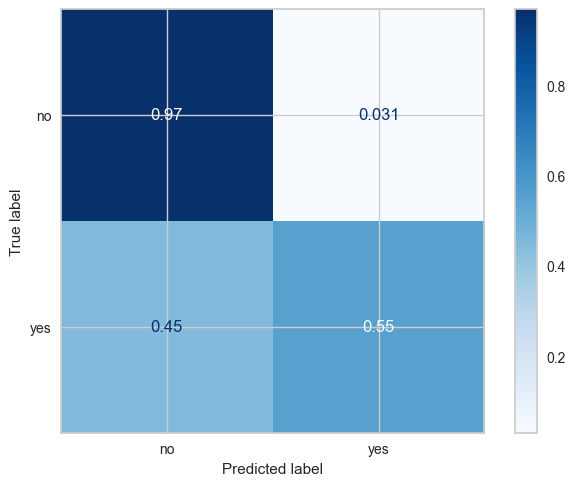

In [94]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, xg_step.predict(X_test),
                             normalize='true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=['no', 'yes'])
disp.plot(cmap='Blues')

## Data Size

Examining if you have enough data for an XGBoost model is crucial, as having sufficient data is essential for building a robust and accurate model. In this section, we will discuss learning curves, a method for determining if you have enough data.



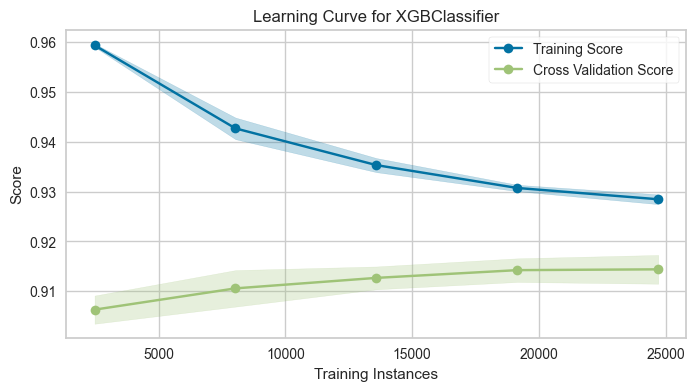

In [93]:
import yellowbrick.model_selection as ms

fig, ax = plt.subplots(figsize=(8,4))
viz = ms.learning_curve(xgb.XGBClassifier(**step_params, n_estimators=85), X_train, y_train,
                        ax=ax)

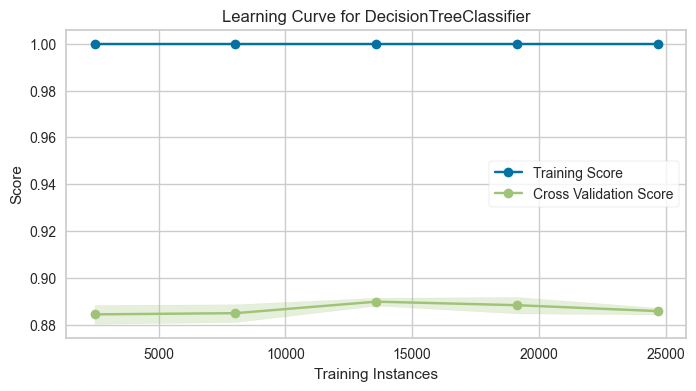

In [94]:
from sklearn import tree

# overfit
fig, ax = plt.subplots(figsize=(8,4))
viz = ms.learning_curve(tree.DecisionTreeClassifier(),
                        X_train, y_train,
                        ax=ax)

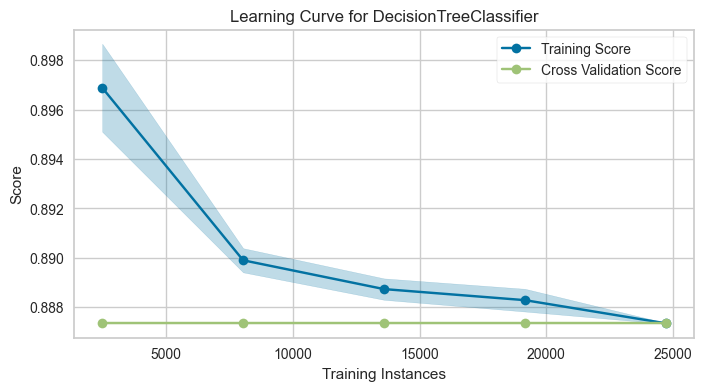

In [95]:
# underfit
fig, ax = plt.subplots(figsize=(8,4))
viz = ms.learning_curve(tree.DecisionTreeClassifier(max_depth=1),
                        X_train, y_train,
                        ax=ax)

## Interpreting

Interpreting feature importance in XGBoost models is a critical step in understanding how the model is making predictions and identifying which features are most relevant to the target variable. Additionally, we will discuss some best practices for feature selection and how to use feature importance to inform feature engineering efforts.

In [96]:
from sklearn import linear_model, preprocessing
std = preprocessing.StandardScaler()
lr = linear_model.LogisticRegression(penalty=None)
lr.fit(std.fit_transform(X_train), y_train)
lr.score(std.transform(X_test), y_test)

0.913761289696028

<Axes: >

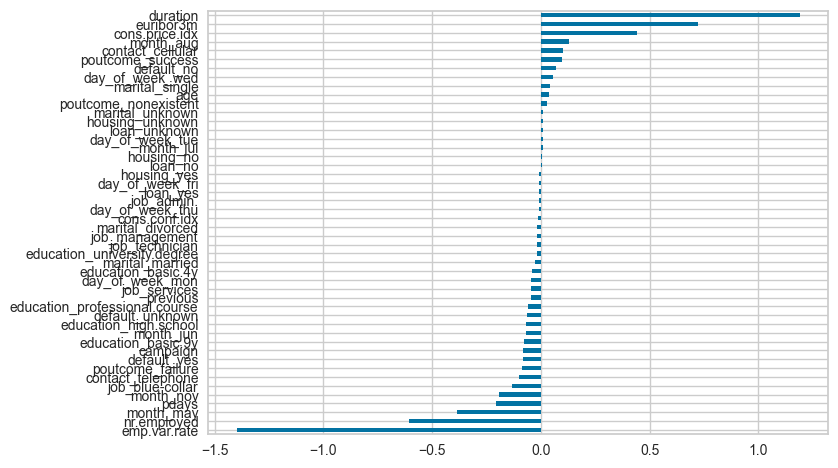

In [97]:
(pd.Series(lr.coef_[0], index=X_train.columns)
 .sort_values()
 .plot.barh()
)

<Axes: >

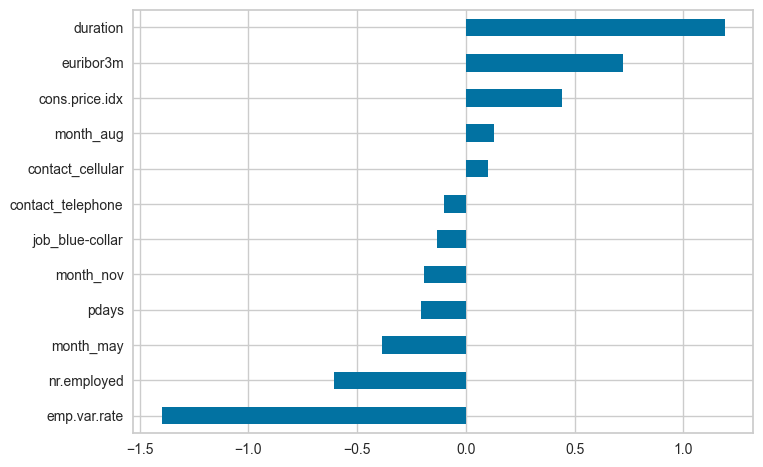

In [98]:
(pd.Series(lr.coef_[0], index=X_train.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > .1])
 .plot.barh()
)

<Axes: >

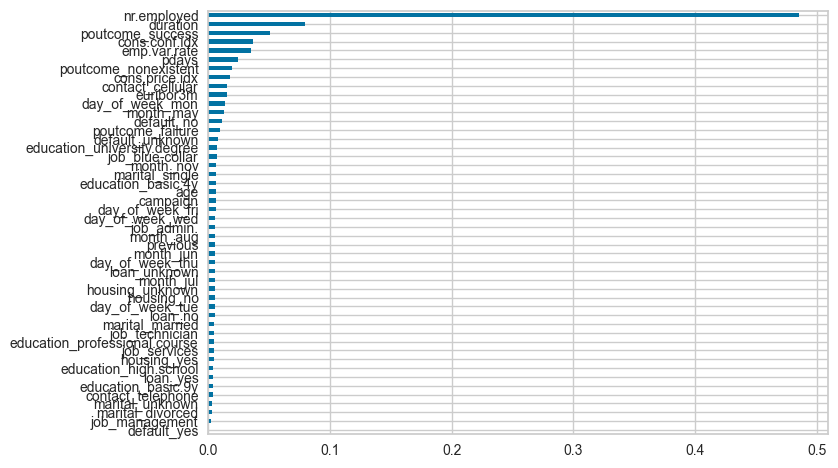

In [99]:
(pd.Series(xg_step.feature_importances_, index=X_train.columns)
 .sort_values()
 .plot.barh()
)

<Axes: >

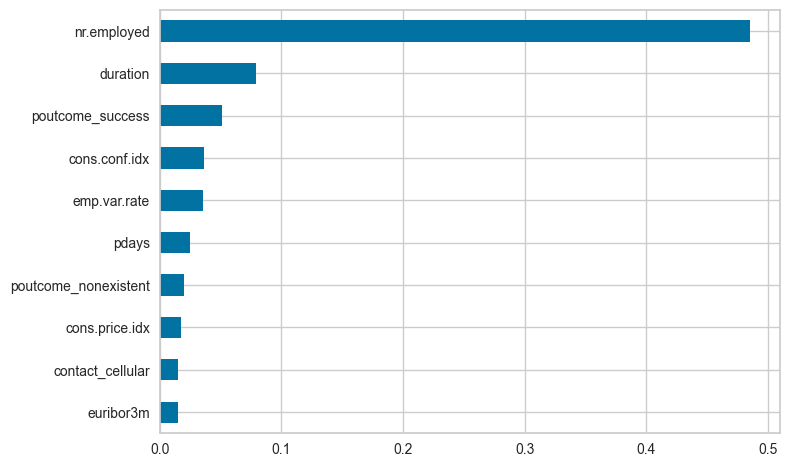

In [100]:
(pd.Series(xg_step.feature_importances_, index=X_train.columns)
 .sort_values()
 .iloc[-10:]
 .plot.barh()
)

<Axes: >

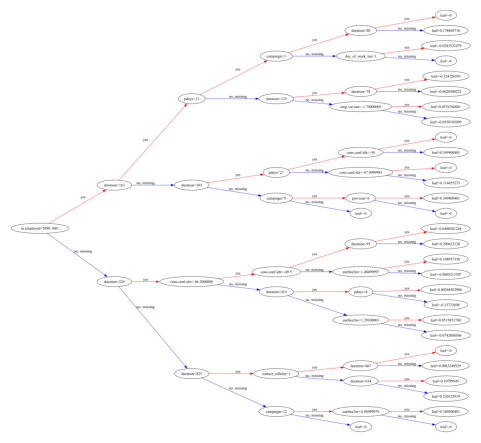

In [101]:
xgb.plot_tree(xg_step, num_trees=0, rankdir='LR')

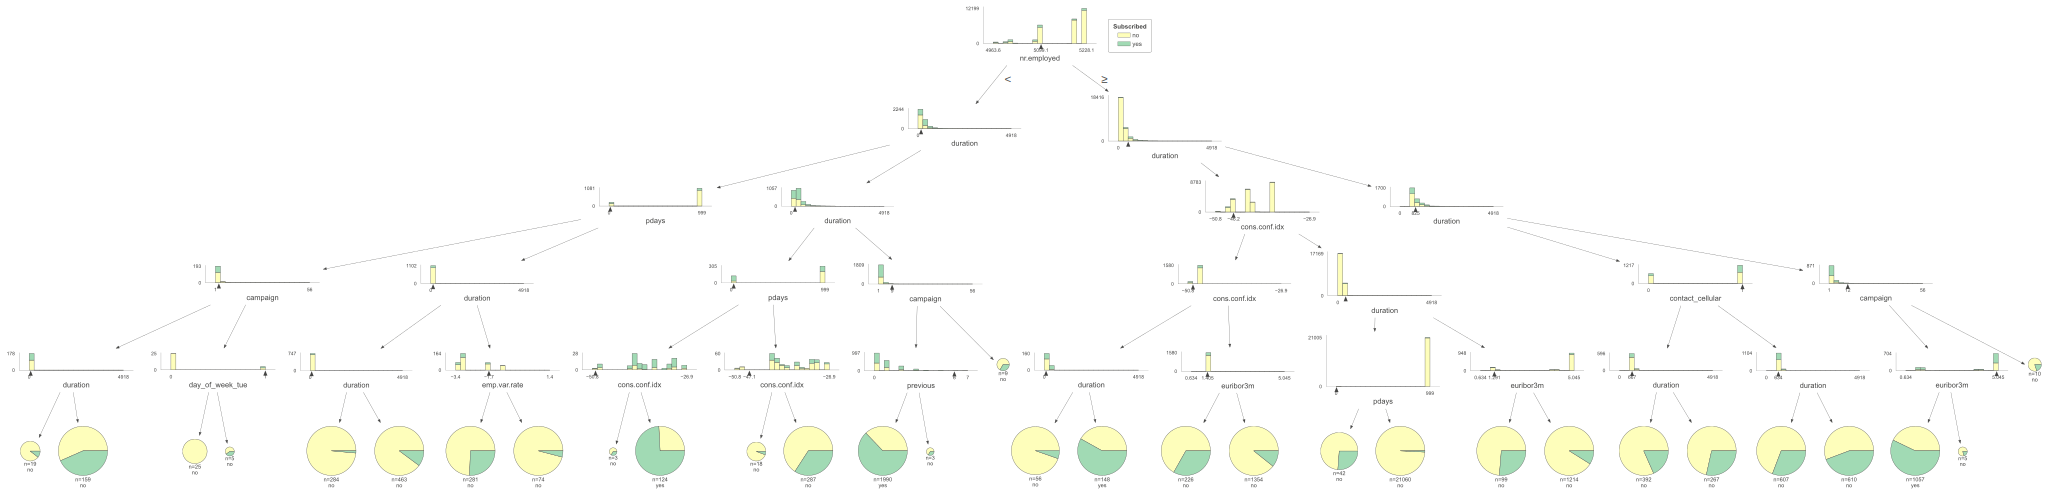

In [103]:
import dtreeviz

viz = dtreeviz.model(xg_step, X_train=X_train,
    y_train=y_train,
    target_name='Subscribed',
    feature_names=list(X_train.columns), class_names=['no', 'yes'],
    tree_index=0)
viz.view()

## SHAP

SHAP (SHapley Additive exPlanations) is a popular technique for interpreting the output of XGBoost models. By using SHAP values, you can understand the contribution of each feature to the model's output, allowing you to gain insights into the model's behavior and identify which features are most important for making predictions. In this section, we will introduce SHAP and demonstrate how to use it to interpret an XGBoost model's output.

In [104]:
step_params = {'random_state': 42,
 'eval_metric': 'aucpr',
 'max_depth': 5,
 'min_child_weight': 0.40955706198076997,
 'scale_pos_weight': 0.9905053053984747,
 'max_delta_step': 2.5647279651404142,
 'subsample': 0.9218283433838903,
 'colsample_bytree': 0.8745526720031428,
 'reg_alpha': 2.544255203894046,
 'reg_lambda': 5.148667230199518,
 'gamma': 7.256495602943867e-05,
 'learning_rate': 0.136232934679776}

In [105]:
import xgboost as xgb
xg_step = xgb.XGBClassifier(**step_params, early_stopping_rounds=20)
xg_step.fit(X_train, y_train, eval_set=[(X_train, y_train),
                                        (X_test, y_test)], 
           verbose=100)
xg_step.score(X_test, y_test)

[0]	validation_0-aucpr:0.55722	validation_1-aucpr:0.57881
[61]	validation_0-aucpr:0.72642	validation_1-aucpr:0.68802


0.9207536175585121

In [106]:
import shap
shap.initjs()

shap_ex = shap.TreeExplainer(xg_step)
vals = shap_ex(X_test)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


[06:20:37] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [107]:
vals_df = pd.DataFrame(vals.values, columns=X_test.columns, index=X_test.index)
vals_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jun,month_nov,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
31165,-0.074196,1.867732,0.013453,-0.065509,0.011122,0.184804,0.008714,-0.070300,0.152691,-0.220652,...,0.000474,0.005628,0.006084,0.006717,0.033181,-0.000637,0.000247,0.008612,0.022834,-0.037345
26855,0.033310,-2.903239,0.013002,-0.033482,0.003004,-0.075590,-0.003712,-0.142992,-0.158743,-0.285620,...,0.000275,0.004687,-0.012692,0.038842,-0.001185,-0.000928,0.000268,0.004480,0.019425,-0.015250
38292,-0.051849,-1.673696,-0.032853,-0.114449,0.004420,0.465251,0.190148,0.043133,0.124132,1.138269,...,0.000556,0.005716,0.002961,0.019116,0.012294,-0.003772,0.000294,0.009423,0.010463,-0.048842
8532,-0.021624,-0.524398,-0.014202,-0.049773,0.003271,-1.293525,0.002353,-0.090453,-0.011202,-0.397198,...,-0.002805,0.002406,0.009815,0.067429,0.016219,-0.000467,-0.000754,0.004215,0.014994,-0.015306
25472,-0.035687,-1.576620,0.017808,-0.035708,0.003223,-0.188116,0.005678,-0.202231,-0.201744,-0.358876,...,0.000310,-0.012347,0.003658,0.039108,0.010928,-0.003810,0.000031,0.004480,0.026845,-0.010874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,-0.031589,-1.441689,-0.000327,-0.040988,0.003228,-1.732918,0.042409,-0.095102,0.078868,-0.399139,...,0.000219,0.000895,0.004902,-0.042551,-0.005370,-0.001425,-0.006162,0.003356,0.011828,-0.011521
23672,-0.018766,-2.866729,-0.062274,-0.030752,0.002896,-0.784544,0.083778,-0.083386,0.056149,-0.275235,...,0.000227,-0.000036,-0.041580,0.027953,-0.001598,-0.000764,-0.000730,0.003339,0.010440,-0.013933
12770,-0.085078,-1.515224,0.003681,-0.045057,0.003212,-1.794398,0.058498,-0.166468,0.244774,-0.407157,...,0.000310,0.003891,0.009651,0.072630,-0.005534,0.006394,-0.006165,0.004215,0.018811,-0.008772
4177,-0.020656,-1.681380,-0.052096,-0.037910,0.003184,-1.417056,0.029280,-0.100357,0.100808,-0.374710,...,0.000192,0.001943,0.004582,-0.025238,-0.004865,-0.001551,-0.006400,0.001808,0.010504,-0.008901


In [108]:
shap_ex.expected_value

-2.2278752

In [109]:
# index 40153 prediction

(vals_df.sum(axis='columns') + shap_ex.expected_value).pipe(lambda ser: ser[ser > 0])

40153    1.526257
31072    1.051464
40637    0.640781
40291    0.990601
40795    0.520954
           ...   
7555     0.113342
35227    0.262634
32317    1.016251
39988    0.113837
13792    0.218026
Length: 868, dtype: float32

In [110]:
vals_df.loc[40153]

age                             -0.030579
duration                        -0.086855
campaign                         0.043589
pdays                            1.045791
previous                        -0.002494
emp.var.rate                     0.489961
cons.price.idx                   0.084106
cons.conf.idx                    0.108307
euribor3m                        0.202555
nr.employed                      1.546488
job_admin.                      -0.001924
job_blue-collar                  0.007421
job_technician                  -0.001102
job_services                     0.000038
job_management                   0.000196
marital_married                 -0.001022
marital_single                   0.008596
marital_divorced                -0.000069
marital_unknown                 -0.000013
education_university.degree     -0.012944
education_high.school           -0.000032
education_basic.9y               0.005331
education_professional.course    0.004105
education_basic.4y               0

In [111]:
# original values

X_test.loc[40153]

age                                52.000
duration                          219.000
campaign                            1.000
pdays                               3.000
previous                            1.000
emp.var.rate                       -1.700
cons.price.idx                     94.215
cons.conf.idx                     -40.300
euribor3m                           0.846
nr.employed                      4991.600
job_admin.                          0.000
job_blue-collar                     0.000
job_technician                      1.000
job_services                        0.000
job_management                      0.000
marital_married                     1.000
marital_single                      0.000
marital_divorced                    0.000
marital_unknown                     0.000
education_university.degree         0.000
education_high.school               0.000
education_basic.9y                  0.000
education_professional.course       0.000
education_basic.4y                

In [112]:
X_test.index.get_loc(40153)

26

In [113]:
X_test.iloc[26]

age                                52.000
duration                          219.000
campaign                            1.000
pdays                               3.000
previous                            1.000
emp.var.rate                       -1.700
cons.price.idx                     94.215
cons.conf.idx                     -40.300
euribor3m                           0.846
nr.employed                      4991.600
job_admin.                          0.000
job_blue-collar                     0.000
job_technician                      1.000
job_services                        0.000
job_management                      0.000
marital_married                     1.000
marital_single                      0.000
marital_divorced                    0.000
marital_unknown                     0.000
education_university.degree         0.000
education_high.school               0.000
education_basic.9y                  0.000
education_professional.course       0.000
education_basic.4y                

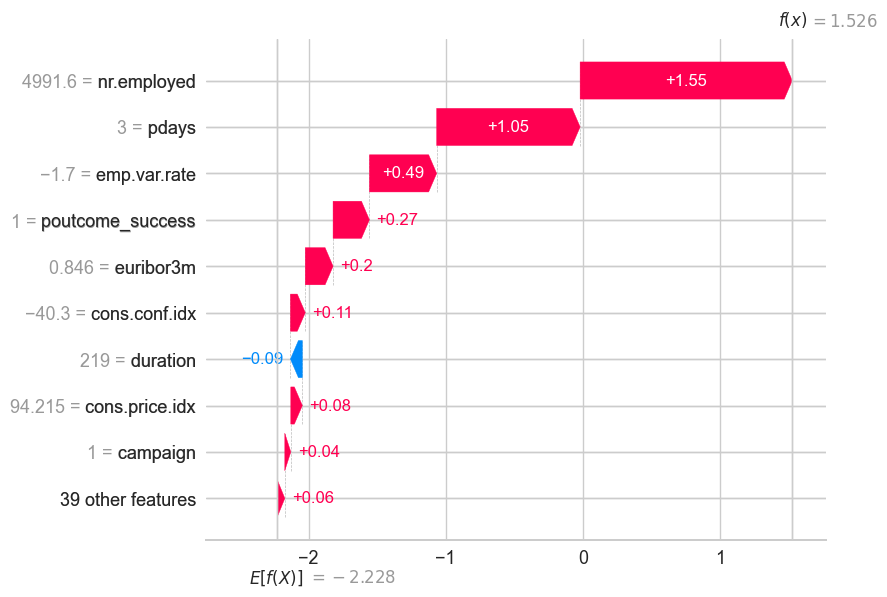

In [114]:
# waterfall plot

# need to convert label to position
shap.plots.waterfall(vals[26])

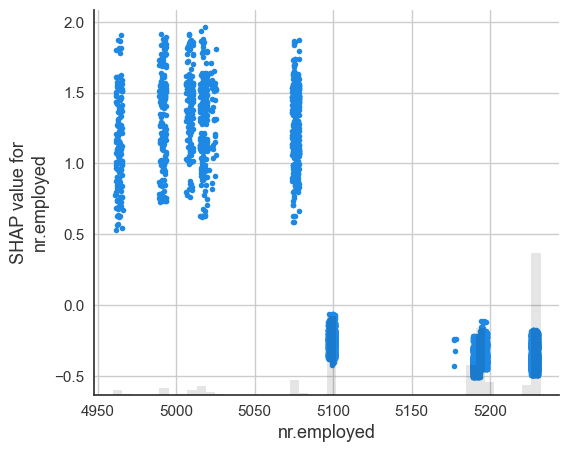

In [115]:
# dependence plot
# try to understand nr.employed
shap.plots.scatter(vals[:, 'nr.employed'])

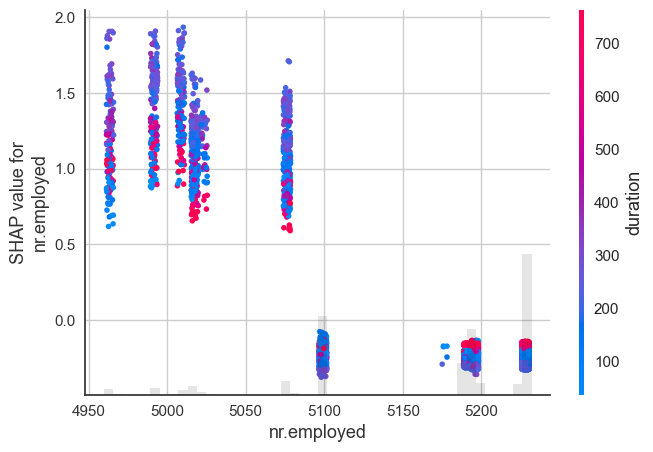

In [122]:
# dependence plot
# try to understand nr.employed
shap.plots.scatter(vals[:, 'nr.employed'], color=vals)

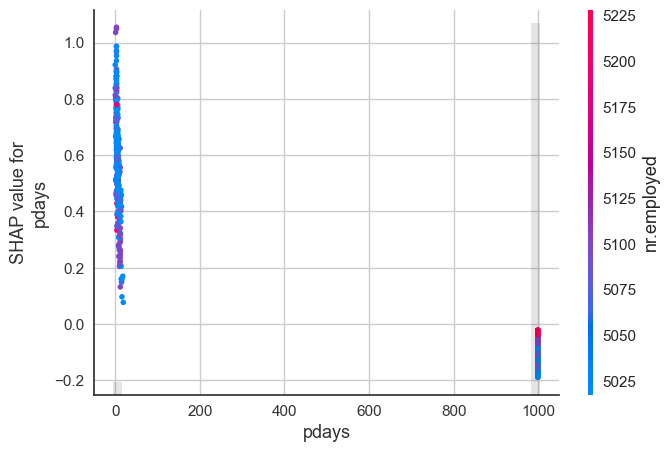

In [123]:
# dependence plot
# try to understand pdays
# 999 means not contacted
shap.plots.scatter(vals[:, 'pdays'], color=vals)

(0.0, 20.0)

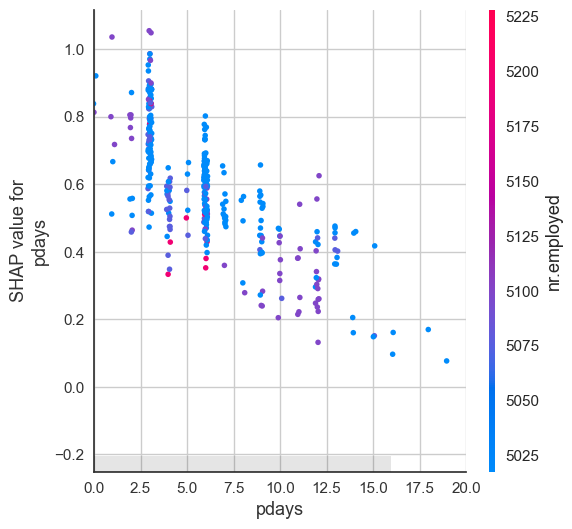

In [124]:
# dependence plot
# try to understand pdays
# 999 means not contacted
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
shap.plots.scatter(vals[:, 'pdays'], color=vals, show=False, ax=ax)
ax.set_xlim(0,20)

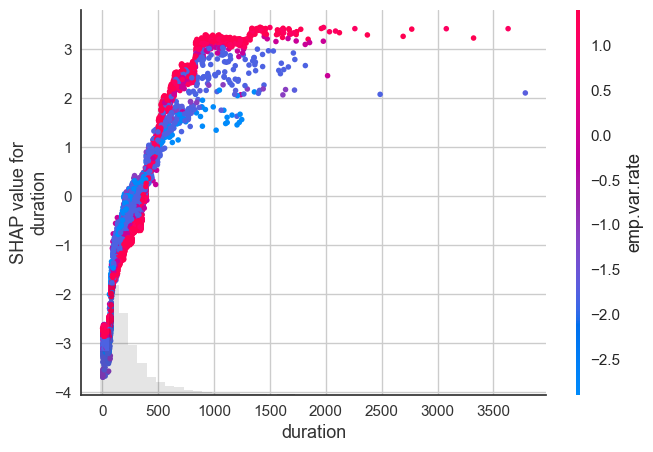

In [125]:
# dependence plot
shap.plots.scatter(vals[:, 'duration'], color=vals)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


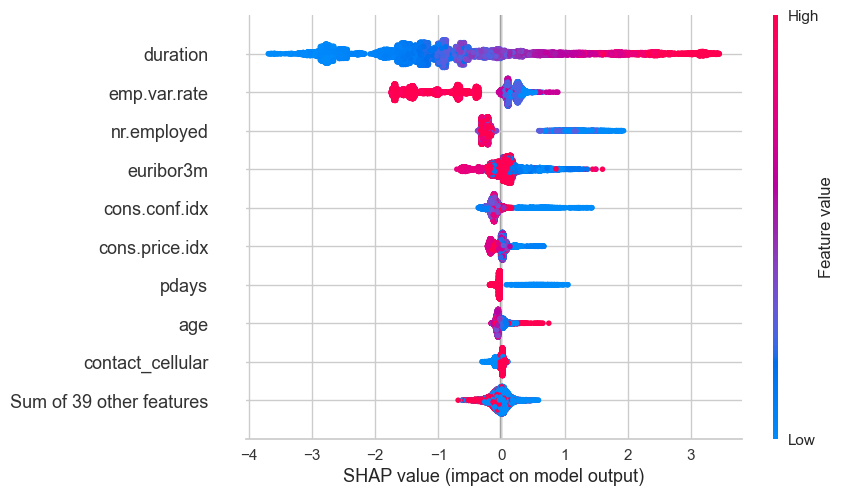

In [126]:
# global view
shap.plots.beeswarm(vals)

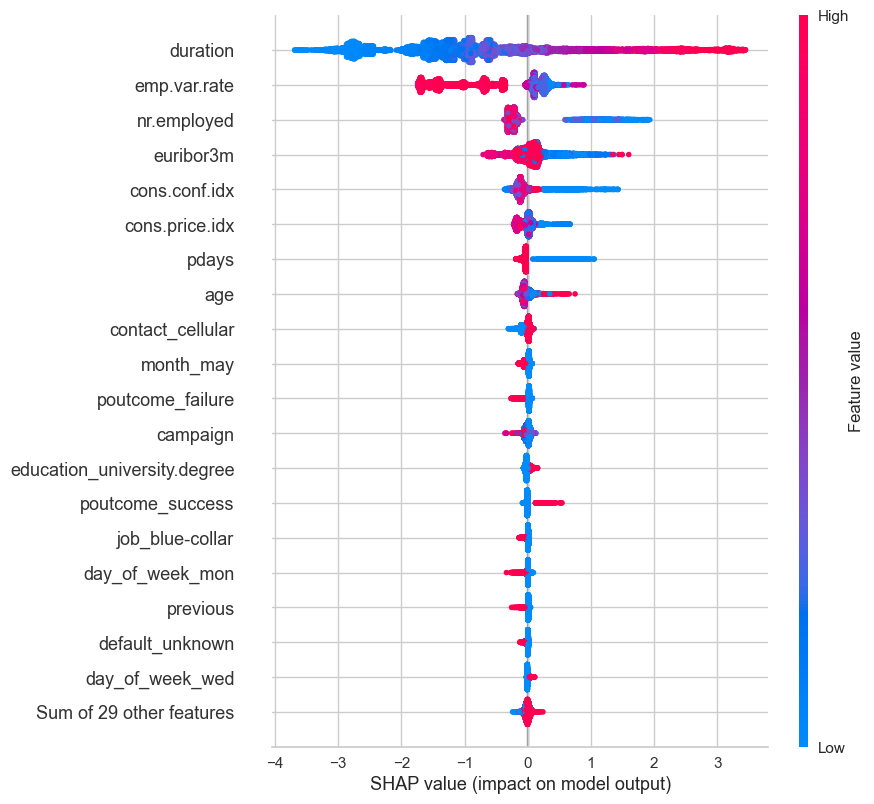

In [127]:
# global view
shap.plots.beeswarm(vals, max_display=20)

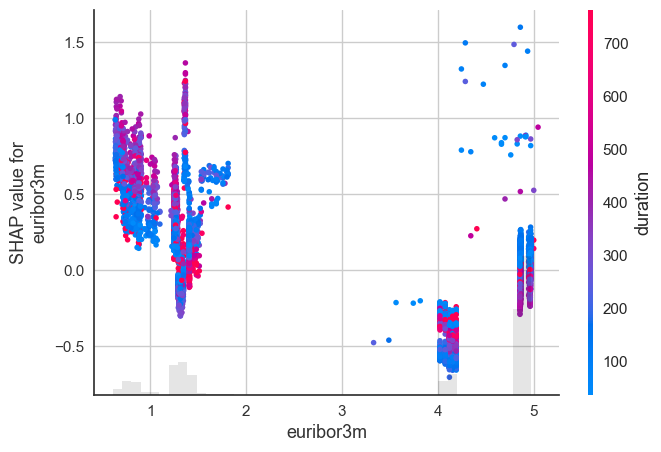

In [128]:
# dependence plot
shap.plots.scatter(vals[:, 'euribor3m'], color=vals)

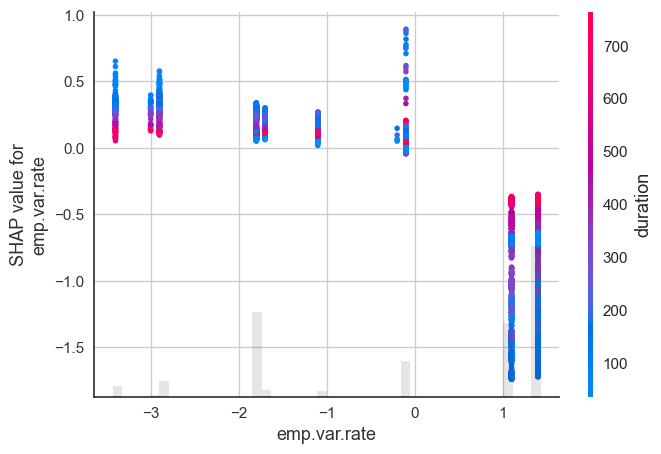

In [129]:
# dependence plot
shap.plots.scatter(vals[:, 'emp.var.rate'], color=vals)

## Constraints

Monotonic constraints and Partial Dependence Plots (PDPs) are two powerful techniques for improving the interpretability of XGBoost models. Monotonic constraints can be used to enforce a monotonic relationship between a feature and the target variable, while PDPs can help visualize that relationship.

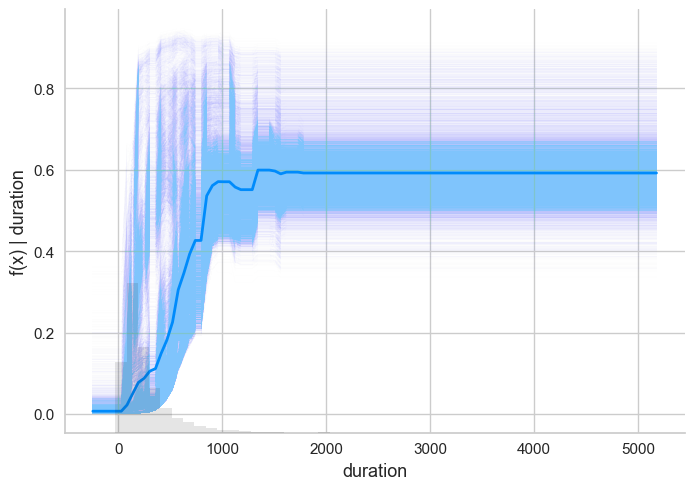

In [130]:
# PDP and ICE plots
shap.plots.partial_dependence(ind='duration',
      model=lambda rows: xg_step.predict_proba(rows)[:,-1],
      data=X_train)

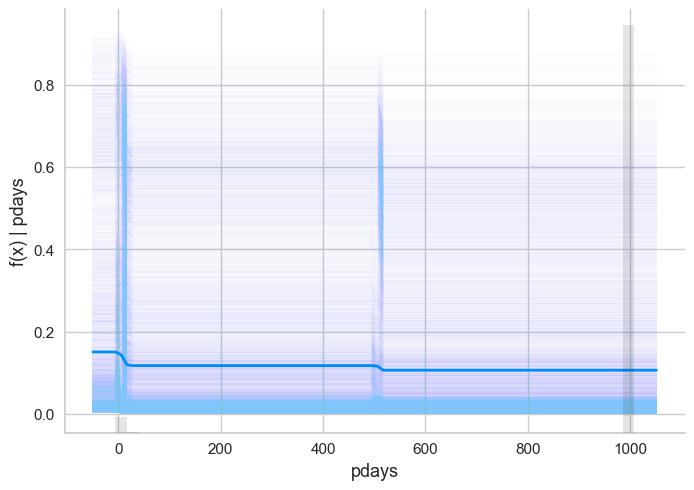

In [131]:
# PDP and ICE plots
shap.plots.partial_dependence(ind='pdays',
      model=lambda rows: xg_step.predict_proba(rows)[:,-1],
      data=X_train)

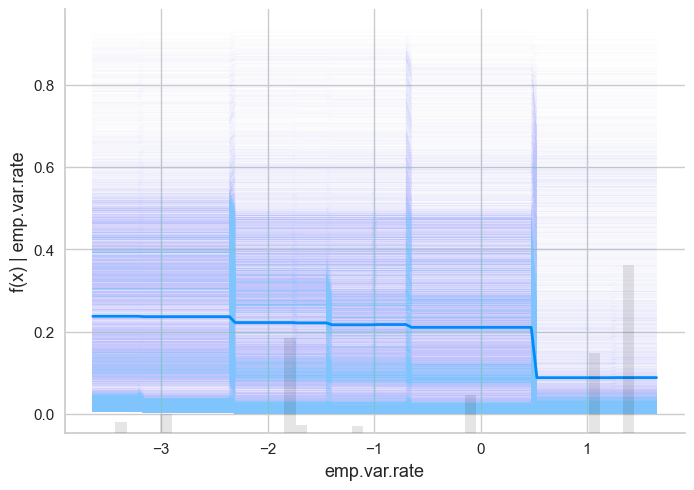

In [132]:
# PDP and ICE plots
shap.plots.partial_dependence(ind='emp.var.rate',
      model=lambda rows: xg_step.predict_proba(rows)[:,-1],
      data=X_train)

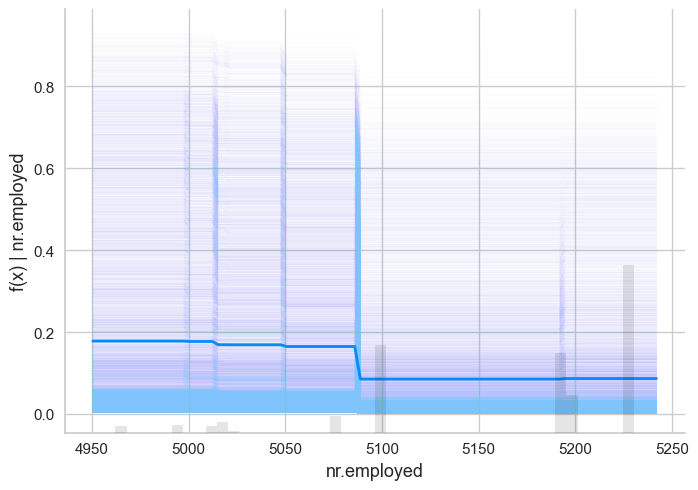

In [133]:
# PDP and ICE plots
shap.plots.partial_dependence(ind='nr.employed',
      model=lambda rows: xg_step.predict_proba(rows)[:,-1],
      data=X_train)

In [134]:
step_params = {'random_state': 42,
 'eval_metric': 'aucpr',
 'max_depth': 5,
 'min_child_weight': 0.40955706198076997,
 'scale_pos_weight': 0.9905053053984747,
 'max_delta_step': 2.5647279651404142,
 'subsample': 0.9218283433838903,
 'colsample_bytree': 0.8745526720031428,
 'reg_alpha': 2.544255203894046,
 'reg_lambda': 5.148667230199518,
 'gamma': 7.256495602943867e-05,
 'learning_rate': 0.136232934679776}

In [135]:
import xgboost as xgb
xg_const = xgb.XGBClassifier(**step_params, early_stopping_rounds=20, 
                            monotone_constraints={'duration':1, 'pdays':-1,
                                                 'emp.var.rate':-1, 'nr.employed':-1})
xg_const.fit(X_train, y_train, eval_set=[(X_train, y_train),
                                        (X_test, y_test)], 
           verbose=100)
xg_const.score(X_test, y_test)

[0]	validation_0-aucpr:0.56942	validation_1-aucpr:0.58023
[99]	validation_0-aucpr:0.72536	validation_1-aucpr:0.68700


0.9221132368651064

In [136]:
# bump up n_estimators
# in this case, wasn't required
xg_const = xgb.XGBClassifier(**step_params, early_stopping_rounds=20, 
                             n_estimators=200,
                            monotone_constraints={'duration':1, 'pdays':-1,
                                                 'emp.var.rate':-1, 'nr.employed':-1})
xg_const.fit(X_train, y_train, eval_set=[(X_train, y_train),
                                        (X_test, y_test)], 
           verbose=100)
xg_const.score(X_test, y_test)

[0]	validation_0-aucpr:0.56942	validation_1-aucpr:0.58023
[100]	validation_0-aucpr:0.72621	validation_1-aucpr:0.68644
[115]	validation_0-aucpr:0.73434	validation_1-aucpr:0.68659


0.9221132368651064

In [137]:
from sklearn import metrics

metrics.roc_auc_score(y_test, xg_const.predict(X_test))

0.7529040694712291

In [138]:
xg_step.score(X_test, y_test)

0.9206565018937555

<AxesSubplot: >

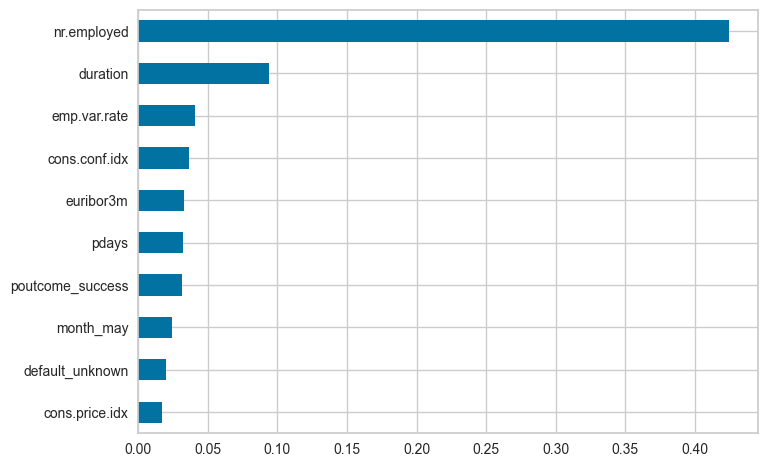

In [139]:
(pd.Series(xg_step.feature_importances_, index=X_train.columns)
 .sort_values()
 .iloc[-10:]
 .plot.barh()
)

<AxesSubplot: >

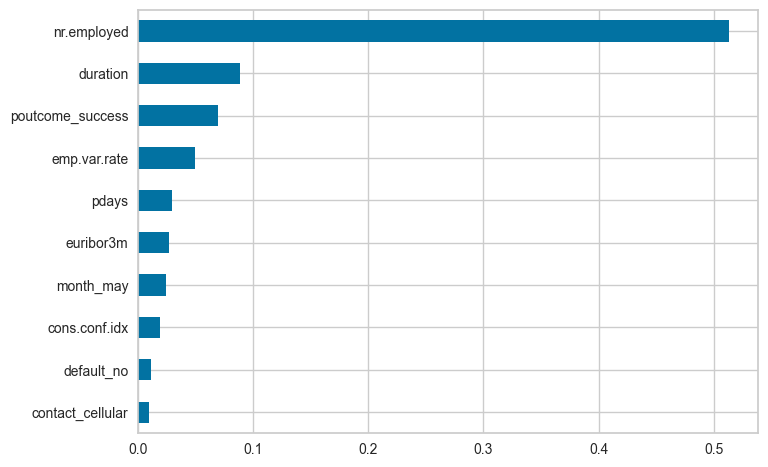

In [140]:
(pd.Series(xg_const.feature_importances_, index=X_train.columns)
 .sort_values()
 .iloc[-10:]
 .plot.barh()
)

In [141]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

0.9185199572691075

<AxesSubplot: >

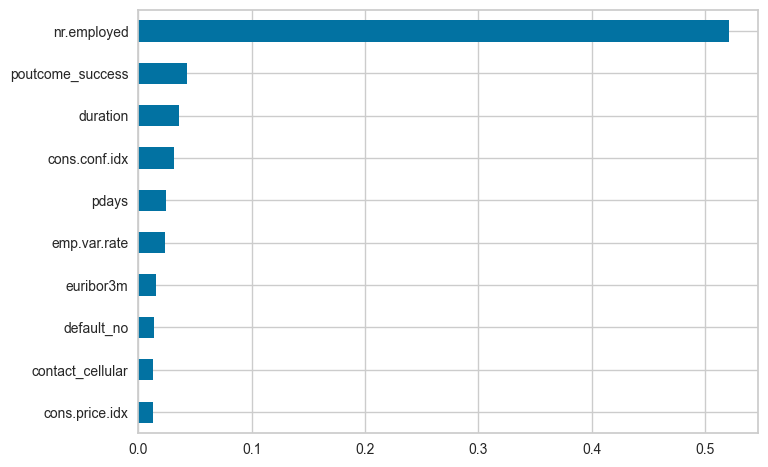

In [142]:
(pd.Series(xg.feature_importances_, index=X_train.columns)
 .sort_values()
 .iloc[-10:]
 .plot.barh()
)

## Deployment

 MLflow is an open-source platform that provides tools for managing the end-to-end machine learning workflow, including model tracking, experimentation management, and model deployment. In this section, we will persist a model with MLFlow.







In [144]:
from feature_engine import encoding, imputation
import pandas as pd
from sklearn import base, compose, model_selection, pipeline, preprocessing
import xgboost as xgb

bank = pd.read_csv('/Users/matt/Downloads/bank-additional/bank-additional-full.csv', sep=';')

def tweak_bank(df):
    return (df
        .assign(**df.select_dtypes(object).astype('category'))
    )


class BankTransformer(base.BaseEstimator, base.TransformerMixin):
    def transform(self, X):
        return tweak_bank(X)
        #return X
    def fit(self, X, y=None):
        return self

pl = pipeline.Pipeline(
    [('tweak', BankTransformer()),
     ('cat_encoder', encoding.OneHotEncoder(top_categories=5, drop_last=True)),
     #('num_impute', imputation.MeanMedianImputer(imputation_method='median'))
    ]
)

X_raw_train, X_raw_test, y_raw_train, y_raw_test= model_selection.train_test_split(
    bank.drop(columns='y'), bank.y, stratify=bank.y, random_state=42)
X_train = pl.fit_transform(X_raw_train)
X_test = pl.transform(X_raw_test)

label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_raw_train)
y_test = label_encoder.transform(y_raw_test)

step_params = {'random_state': 42,
 'eval_metric': 'aucpr',
 'max_depth': 5,
 'min_child_weight': 0.40955706198076997,
 'scale_pos_weight': 0.9905053053984747,
 'max_delta_step': 2.5647279651404142,
 'subsample': 0.9218283433838903,
 'colsample_bytree': 0.8745526720031428,
 'reg_alpha': 2.544255203894046,
 'reg_lambda': 5.148667230199518,
 'gamma': 7.256495602943867e-05,
 'learning_rate': 0.136232934679776}


xg_const = xgb.XGBClassifier(**step_params, early_stopping_rounds=200, 
                            monotone_constraints={'duration':1, 'pdays':-1,
                                                 'emp.var.rate':-1, 'nr.employed':-1})
xg_const.fit(X_train, y_train, eval_set=[(X_train, y_train),
                                        (X_test, y_test)], 
           verbose=100)

[0]	validation_0-aucpr:0.56942	validation_1-aucpr:0.58023
[99]	validation_0-aucpr:0.72536	validation_1-aucpr:0.68700


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8745526720031428, early_stopping_rounds=200,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=7.256495602943867e-05, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.136232934679776, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=2.5647279651404142, max_depth=5, max_leaves=0,
              min_child_weight=0.40955706198076997, missing=nan,
              monotone_constraints={'duration': 1, 'emp.var.rate': -1,
                                    'nr.employed': -1, 'pdays': -1},
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, ...)

In [145]:
import mlflow
# log model
model_info = mlflow.xgboost.log_model(xg_const, artifact_path='artifact')

Setuptools is replacing distutils.


In [146]:
model_info.run_id

'df9cbf3b53ba4bd290794b99b3922838'

If I inspect the *mlruns* directory, I can see the *run_id* - 6582ce5456dd47368bb9efe8ce033b5c

```
mlruns/0
├── 6582ce5456dd47368bb9efe8ce033b5c
│   ├── artifacts
│   │   └── artifact
│   │       ├── MLmodel
│   │       ├── conda.yaml
│   │       ├── model.None
│   │       ├── python_env.yaml
│   │       └── requirements.txt
│   ├── meta.yaml
│   ├── metrics
│   ├── params
│   └── tags
│       ├── mlflow.log-model.history
│       ├── mlflow.runName
│       ├── mlflow.source.name
│       ├── mlflow.source.type
│       └── mlflow.user
└── meta.yaml

7 directories, 12 files
```

In [147]:
!tree mlruns/0

mlruns/0
├── 6582ce5456dd47368bb9efe8ce033b5c
│   ├── artifacts
│   │   └── artifact
│   │       ├── MLmodel
│   │       ├── conda.yaml
│   │       ├── model.None
│   │       ├── python_env.yaml
│   │       └── requirements.txt
│   ├── meta.yaml
│   ├── metrics
│   ├── params
│   └── tags
│       ├── mlflow.log-model.history
│       ├── mlflow.runName
│       ├── mlflow.source.name
│       ├── mlflow.source.type
│       └── mlflow.user
├── df9cbf3b53ba4bd290794b99b3922838
│   ├── artifacts
│   │   └── artifact
│   │       ├── MLmodel
│   │       ├── conda.yaml
│   │       ├── model.None
│   │       ├── python_env.yaml
│   │       └── requirements.txt
│   ├── meta.yaml
│   ├── metrics
│   ├── params
│   └── tags
│       ├── mlflow.log-model.history
│       ├── mlflow.runName
│       ├── mlflow.source.name
│       ├── mlflow.source.type
│       └── mlflow.user
└── meta.yaml

13 directories, 23 files


In [148]:
# load a model
import mlflow

# There are multiple ways to specify a model
#logged_model = 'runs:/6582ce5456dd47368bb9efe8ce033b5c/artifact'
logged_model = 'mlruns/0/6582ce5456dd47368bb9efe8ce033b5c/artifacts/artifact'
loaded_model = mlflow.pyfunc.load_model(logged_model)

In [149]:
loaded_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

## Serving Models with MLFlow

This section will demonstrate how to serve XGBoost models with MLflow using the REST API.

Run the command:

```
% mlflow models serve -m mlruns/0/6582ce5456dd47368bb9efe8ce033b5c/artifacts/artifact  -p 1234 --env-manager local
```

In [150]:
import requests as req
import json

def create_post_data(df, quote=True):
    dictionary = {'dataframe_split': json.loads(df
       .to_json(orient='split', index=False))}
    if quote:
        return f"'{dictionary}'"
    else:
        return dictionary

r = req.post('http://127.0.0.1:1234/invocations', json=create_post_data(X_test, quote=False))
r.text

'{"predictions": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0

## Conclusion

Congratulations! You have completed our XGBoost course, which covers essential concepts, techniques, and best practices for building and deploying XGBoost models. You have learned how to load and explore data, clean and prepare it for modeling, create benchmark models, tune hyperparameters with Hyperopt, evaluate model performance, interpret feature importance using SHAP and PDP plots, and deploy models with MLflow.

We hope this course has helped advance your knowledge of XGBoost and provided you with practical skills to apply to your machine learning projects. We encourage you to continue practicing and experimenting with XGBoost and other machine learning algorithms and leave us a review of the course to help us improve and better serve our learners in the future. Thank you for choosing to learn with us!

Reach out to matt@metasnake.com if your team needs consulting or training.